# Electronics Store purchases Sales Data Analysis 

# Problem Statement

The Data sets contains 12 months worth of sales data of hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc. 
where 5 high level business questions as to answered:
- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?


## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os # this is use to interact with the operating system

print("We are ready "+ "Hezekiah use us") # note: this is to check if the libraries were properly imported

We are ready Hezekiah use us


# Viewing the first set of Data in the Datasets

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
df.shape

(18383, 6)

# Viewing all the CSV files in the Datasets

In [4]:
files=[file for file in os.listdir("./Sales_Data")]

for file in files:
    print(file)



Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


# Merging All the Datasets

In [5]:
all_monthsdata = pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales_Data/" + file)
    all_monthsdata = pd.concat([all_monthsdata , df])
    
# Here we go..............
    
all_monthsdata.head(10)
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


# Saving the merged Datasets into a single CSV file

In [6]:
all_monthsdata.to_csv("all_monthsdata.csv", index=False)

# Working with the New Dataset

In [7]:
all_monthsdata =pd.read_csv("all_monthsdata.csv")
all_monthsdata.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


# Getting to know the Dataset

In [8]:
all_monthsdata.shape

(186850, 6)

In [9]:
all_monthsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [10]:
all_monthsdata.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

# Data Cleaning

### Dropping Rows with NaNs

In [11]:
nan_all_monthsdata = all_monthsdata[all_monthsdata.isna().any(axis=1)]
display(nan_all_monthsdata.head())



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
all_monthsdata = all_monthsdata.dropna(how='all')
all_monthsdata.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
all_monthsdata.shape

(186305, 6)

## Getting rid of text in the Order Date Column

In [14]:
all_monthsdata = all_monthsdata[all_monthsdata["Order Date"].str[0:2] != "Or"]

all_monthsdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Making the Quantity Ordered and Price Each Columns to correct type

In [15]:
all_monthsdata["Quantity Ordered"] = pd.to_numeric(all_monthsdata["Quantity Ordered"]) # to convert to int
all_monthsdata["Price Each"] = pd.to_numeric(all_monthsdata["Price Each"]) # to float

### Task1: Adding the City Column from the Purchase Address Column

In [16]:
def getCity(address):
    return address.split(",")[1].strip(" ")

def getState(address):
    return address.split(",")[2].split(" ")[1]

all_monthsdata['City'] = all_monthsdata['Purchase Address'].apply(lambda x: getCity(x) + ' (' + getState(x) + ')')
all_monthsdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


### Task2: Adding the Month Column from the Ordered Date Column to the dataset

In [17]:
all_monthsdata["Month"] = all_monthsdata["Order Date"].str[0:2]

all_monthsdata["Month"] = all_monthsdata["Month"].astype("int32")


all_monthsdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas (TX),4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston (MA),4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),4


In [18]:
all_monthsdata.sort_values(by=["Month"], ascending=True)
all_monthsdata.head(10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas (TX),4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston (MA),4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),4
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",San Francisco (CA),4
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",Seattle (WA),4
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",Atlanta (GA),4
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",San Francisco (CA),4
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",Boston (MA),4


# Data Exploration

# Question 1: 
- What was the the best Month for Sales?
- How much was earn that Month?

### Task3: Adding the Sales Column to the Dataset

In [19]:
all_monthsdata["Sales ($)"] = all_monthsdata["Quantity Ordered"] * all_monthsdata["Price Each"]

all_monthsdata.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Month,Sales ($)
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas (TX),4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston (MA),4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),4,11.99
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",San Francisco (CA),4,11.95
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",Seattle (WA),4,99.99
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",Atlanta (GA),4,11.95
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",San Francisco (CA),4,1700.00
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",Boston (MA),4,11.99


## Best Month for Sales

In [20]:
all_monthsdata.groupby(["Month"]).sum()



,Quantity Ordered,Price Each,Sales ($)
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [21]:
all_monthsdata.drop(columns=["Purchase Address"], axis=1, inplace=True)


The month of December(12) has the highest number of Sales with ~5 million dollars in sales 

# Visualizing 

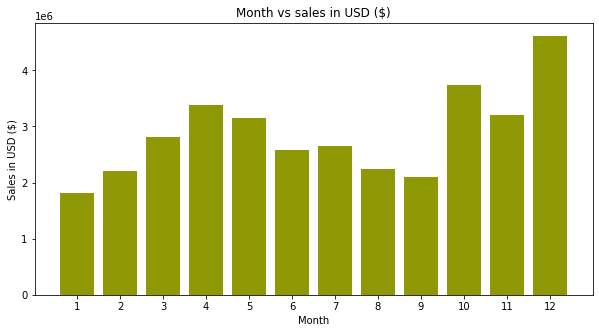

In [89]:
months = range(1,13)

plt.figure(figsize=(10,5))
plt.bar(months,all_monthsdata.groupby(['Month']).sum()['Sales ($)'],color= "xkcd:baby poop green", )
plt.xticks(months)
plt.title('Month vs sales in USD ($)' ,size=12)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.savefig('Electronic1.jpg' ,dpi=300, bbox_inches='tight')
plt.show()


# Question2: 
- What City Had the Highest Number Of Sales?

In [58]:
all_monthsdata.groupby("City").sum()

,Quantity Ordered,Price Each,Month,Sales ($),Hour,Minute,Count
City,,,,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06,214264,442932,14881
Austin (TX),11153,1.809874e+06,69829,1.819582e+06,141946,289060,9905
Boston (MA),22528,3.637410e+06,141112,3.661642e+06,288225,590442,19934
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06,214390,435155,14820
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06,427444,866638,29605
New York City (NY),27932,4.635371e+06,175741,4.664317e+06,357696,733598,24876
Portland (ME),2750,4.471893e+05,17144,4.497583e+05,35211,72856,2455
Portland (OR),11303,1.860558e+06,70621,1.870732e+06,144421,295533,10010
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06,643265,1319477,44732


San Francisco(CA) is the City with the highest number of Sales

# Visualizing 

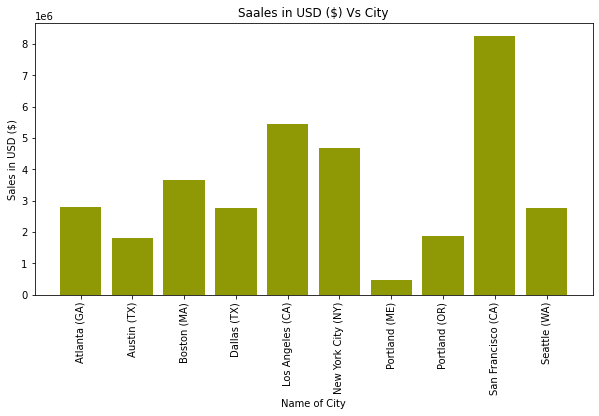

In [59]:
keys = [city for city, df in all_monthsdata.groupby(['City'])]

plt.figure(figsize=(10,5))
plt.bar(keys,all_monthsdata.groupby(['City']).sum()['Sales ($)'], color= "xkcd:baby poop green")
plt.xticks(keys, rotation="vertical")
plt.title('Saales in USD ($) Vs City')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Name of City')
plt.savefig('Electronic2.jpg' ,dpi=300, bbox_inches='tight')
plt.show()


## Question3: 
- What time should we display advertisements to maximize the likelihood of customers buying products?

## Task4:Converting Order Date Column to DateTime 

In [60]:
# Add hour column
all_monthsdata['Hour'] = pd.to_datetime(all_monthsdata['Order Date']).dt.hour
all_monthsdata['Minute'] = pd.to_datetime(all_monthsdata['Order Date']).dt.minute
all_monthsdata['Count'] = 1
all_monthsdata.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,City,Month,Sales ($),Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,Dallas (TX),4,23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,Boston (MA),4,99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,Los Angeles (CA),4,600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,Los Angeles (CA),4,11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,Los Angeles (CA),4,11.99,9,27,1


# Visualizing with Line Plot

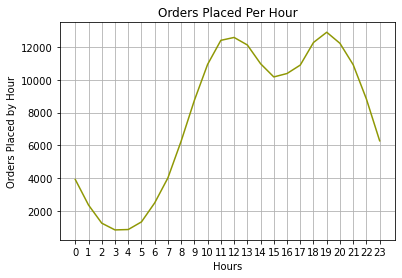

In [70]:
hours = [pair for pair, df in all_monthsdata.groupby(['Hour'])]

plt.plot(keys, all_monthsdata.groupby(['Hour']).count()['Count'], color="xkcd:baby poop green")
plt.xticks(hours)
plt.title("Orders Placed Per Hour")
plt.xlabel('Hours')
plt.ylabel('Orders Placed by Hour')
plt.grid()
plt.savefig('Electronic3.jpg' ,dpi=300, bbox_inches='tight')
plt.show()

From the above visual,I'll recommend slightly before 11am or 7pm.

## Question 4:

What products are most often sold together?

## Task5: Checking for duplicat values in the Order_ID Column 

In [71]:
all_monthsdata2 = all_monthsdata[all_monthsdata["Order ID"].duplicated(keep=False)] 

# get more about the 'keep' is use either to keep the last or first occureence of the duplicated.
# if u're using jupyternootbook use shift plus tab key to know more. I use the False to keep all duplicates values.


There are duplicated values in the Order_ID column

## Creating a New Column from Order_ID and Products columns base on relationships that exists between the two columns

In [72]:
#all_monthsdata2 = all_monthsdata[all_monthsdata["Order ID"].duplicated(keep=False)]

all_monthsdata2['Common Soldproducts'] = all_monthsdata2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

all_monthsdata2.head(10)

<ipython-input-72-bb89d9b2ffc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_monthsdata2['Common Soldproducts'] = all_monthsdata2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,City,Month,Sales ($),Hour,Minute,Count,Common Soldproducts
3,176560,Google Phone,1,600.00,04/12/19 14:38,Los Angeles (CA),4,600.00,14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,Los Angeles (CA),4,11.99,14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,Los Angeles (CA),4,600.00,19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,Los Angeles (CA),4,11.95,19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,Boston (MA),4,99.99,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,Boston (MA),4,99.99,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,San Francisco (CA),4,5.98,17,0,1,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,04/10/19 17:00,San Francisco (CA),4,600.00,17,0,1,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,New York City (NY),4,14.95,11,7,1,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,New York City (NY),4,11.95,11,7,1,"Lightning Charging Cable,USB-C Charging Cable"


Going by above results. Duplicates values in the Order_ID and Common_Soldproducts colunms has to be dropped


In [73]:
all_monthsdata2 = all_monthsdata2[['Order ID', 'Common Soldproducts']].drop_duplicates()

all_monthsdata2.head(10)

,Order ID,Common Soldproducts
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


The new data frame pretty looks good. To answer the question on What products are most often sold together. I'll use the count method.

# Importing neccessary liberaries

In [74]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in all_monthsdata2['Common Soldproducts']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) #row_list (no) could be any desired number of choice not neccessarily 2

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


From the Above results, there are several relationships between the products buyers buy. For instance, 
an iphone user will buy related apple products. This can be use to suggest related product to customers.

## Question 5:

- What product sold the most? 
- Why do you think it sold the most?

# Bar charts Visual for the most sold product

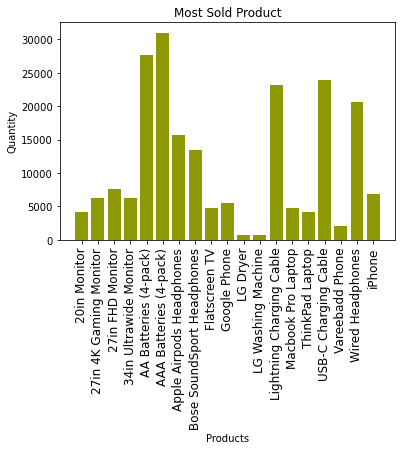

In [78]:
product_group = all_monthsdata.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered,color= "xkcd:baby poop green")
plt.title("Most Sold Product")
plt.xlabel("Products")
plt.ylabel("Quantity")
plt.xticks(keys, rotation='vertical', size=12)
plt.savefig('Electronic4.jpg' ,dpi=300, bbox_inches='tight')
plt.show()

AAA Batteries is the most sold product because it is commonly used in low-drain portable electronic devices

<ipython-input-90-400c41ec2d3f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-90-400c41ec2d3f>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


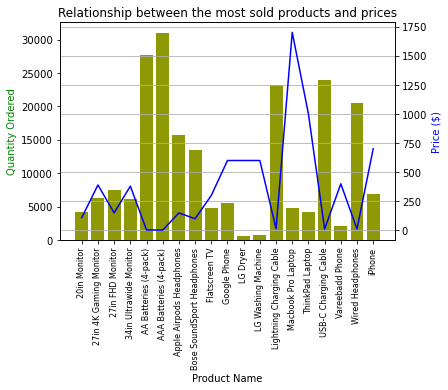

In [90]:

prices = all_monthsdata.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color= "xkcd:baby poop green")
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)
plt.title("Relationship between the most sold products and prices")
plt.savefig('Electronic5.jpg' ,dpi=300, bbox_inches='tight')
plt.grid(True)
fig.show()
